# **STUNTING PREDICTION**

### **PROBLEM STATEMENT**

Stunting, the condition of a child's height being significantly below the expected height for their age, remains a serious public health concern in Indonesia. The latest data shows a stunting prevalence of 21.6% in 2022. This has long-term consequences for children's health and well-being, including impaired physical and cognitive development and reduced productivity in the future.

## **Import Library**

In [ ]:
# Import Library
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import joblib

# **Data Preprocessing**

In [ ]:
# Read csv
df = pd.read_csv('https://raw.githubusercontent.com/saskiaapm/StuntZilla/main/Dataset/Stunting_Dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0    Male   17           3.0            49         10.0         72.2   
1  Female   11           2.9            49          2.9         65.0   
2    Male   16           2.9            49          8.5         72.2   
3    Male   31           2.8            49          6.4         63.0   
4    Male   15           3.1            49         10.5         49.0   

  Breastfeeding Stunting  
0            No       No  
1            No      Yes  
2            No      Yes  
3            No      Yes  
4            No      Yes  


In [ ]:
# Select the required columns
df_baru=df[['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Breastfeeding', 'Stunting']]

In [ ]:
# Displays Sample Data
df_baru.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [ ]:
# Displays DataFrame descriptive statistics
df_baru.describe()

,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,14.255000,2.757600,49.117400,7.631990,68.85492
std,7.923285,0.291092,0.439814,1.720461,8.90664
min,6.000000,2.000000,48.000000,2.900000,49.00000
25%,10.000000,2.800000,49.000000,6.400000,65.00000
50%,13.000000,2.800000,49.000000,7.700000,68.30000
75%,15.000000,2.900000,49.000000,9.000000,72.20000
max,48.000000,3.100000,50.000000,10.500000,92.70000


In [ ]:
# Checking Unique Values
df_baru.nunique()

Gender            2
Age              43
Birth Weight      7
Birth Length      3
Body Weight      13
Body Length      11
Breastfeeding     1
Stunting          2
dtype: int64

In [ ]:
# Change the data type
category_columns = ['Gender', 'Breastfeeding', 'Stunting']

for col in category_columns:
  df_baru[col] = df_baru[col].astype('category')

In [ ]:
# Changed 'Gender' to categorical
df_baru = df_baru.copy()
df_baru['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [ ]:
# Changed 'Breastfeeding' to categorical
df_baru = df_baru.copy()
df_baru['Breastfeeding'].replace( ['No', 'Yes'], [0, 1], inplace=True)

In [ ]:
# Changed 'Stunting' to categorical
df_baru = df_baru.copy()
df_baru['Stunting'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [ ]:
# Summary information about DataFrame
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Gender         10000 non-null  category
 1   Age            10000 non-null  int64   
 2   Birth Weight   10000 non-null  float64 
 3   Birth Length   10000 non-null  int64   
 4   Body Weight    10000 non-null  float64 
 5   Body Length    10000 non-null  float64 
 6   Breastfeeding  10000 non-null  category
 7   Stunting       10000 non-null  category
dtypes: category(3), float64(3), int64(2)
memory usage: 420.4 KB


In [ ]:
# Displays Sample Data
df_baru.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,0,17,3.0,49,10.0,72.2,0,0
1,1,11,2.9,49,2.9,65.0,0,1
2,0,16,2.9,49,8.5,72.2,0,1
3,0,31,2.8,49,6.4,63.0,0,1
4,0,15,3.1,49,10.5,49.0,0,1


In [ ]:
#Finding Missing Data
df_baru.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

In [ ]:
df_baru = df_baru.dropna()

In [ ]:
#Finding Duplicate Data
print("Jumlah duplikasi: ", df_baru.duplicated().sum())

Jumlah duplikasi:  2427


In [ ]:
# Removes duplicates based on all columns
df_baru = df_baru.drop_duplicates()

In [ ]:
# Displays DataFrame descriptive statistics
df_baru.describe()

,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000
mean,14.886967,2.762208,49.084643,7.630648,69.120269
std,8.580291,0.297725,0.436202,1.762529,9.401527
min,6.000000,2.000000,48.000000,2.900000,49.000000
25%,10.000000,2.800000,49.000000,7.000000,65.000000
50%,13.000000,2.800000,49.000000,7.700000,69.000000
75%,16.000000,3.000000,49.000000,9.000000,72.200000
max,48.000000,3.100000,50.000000,10.500000,92.700000


In [ ]:
# Counting Stunting Case for each case
df_baru['Stunting'].value_counts()

Stunting
1    6120
0    1453
Name: count, dtype: int64

In [ ]:
# Counting Stunting Case for each case
df_baru['Age'].value_counts()

Age
13    741
11    734
12    711
14    695
10    629
15    619
9     506
16    463
8     385
17    344
6     298
7     249
18    218
19    135
48    118
20     73
41     42
34     38
21     38
37     35
40     35
32     35
35     32
43     29
38     29
42     28
45     27
36     27
46     26
39     26
44     24
30     22
33     21
29     20
31     17
47     17
27     16
26     16
22     16
25     12
23     11
28     10
24      6
Name: count, dtype: int64

In [ ]:
# Checking the Dimension of dataset
df_baru.shape

(7573, 8)

**Conclusion:**

Missing Value : 0
\
Duplicat : 2427

\
Tipe Data :

Gender   -> Object
\
Age  -> Int
\
Birth Weight -> Float
\
Birth Length -> Int
\
Body Weight -> Float
\
Body Length -> Int
\
Breastfeeding -> Object
\
Stunting -> Object

\
Data Unique :

Gender   -> 2
\
Age  -> 43
\
Birth Weight -> 7
\
Birth Length -> 3
\
Body Weight -> 13
\
Body Length -> 11
\
Breastfeeding -> 1
\
Stunting -> 2

<ipython-input-21-8201d66e1919>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Stunting", data=df_baru, palette="bwr")


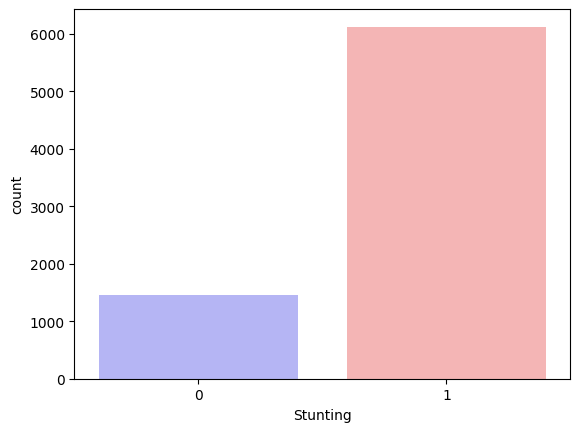

In [ ]:
# Data Visualization
sns.countplot(x="Stunting", data=df_baru, palette="bwr")

plt.show()

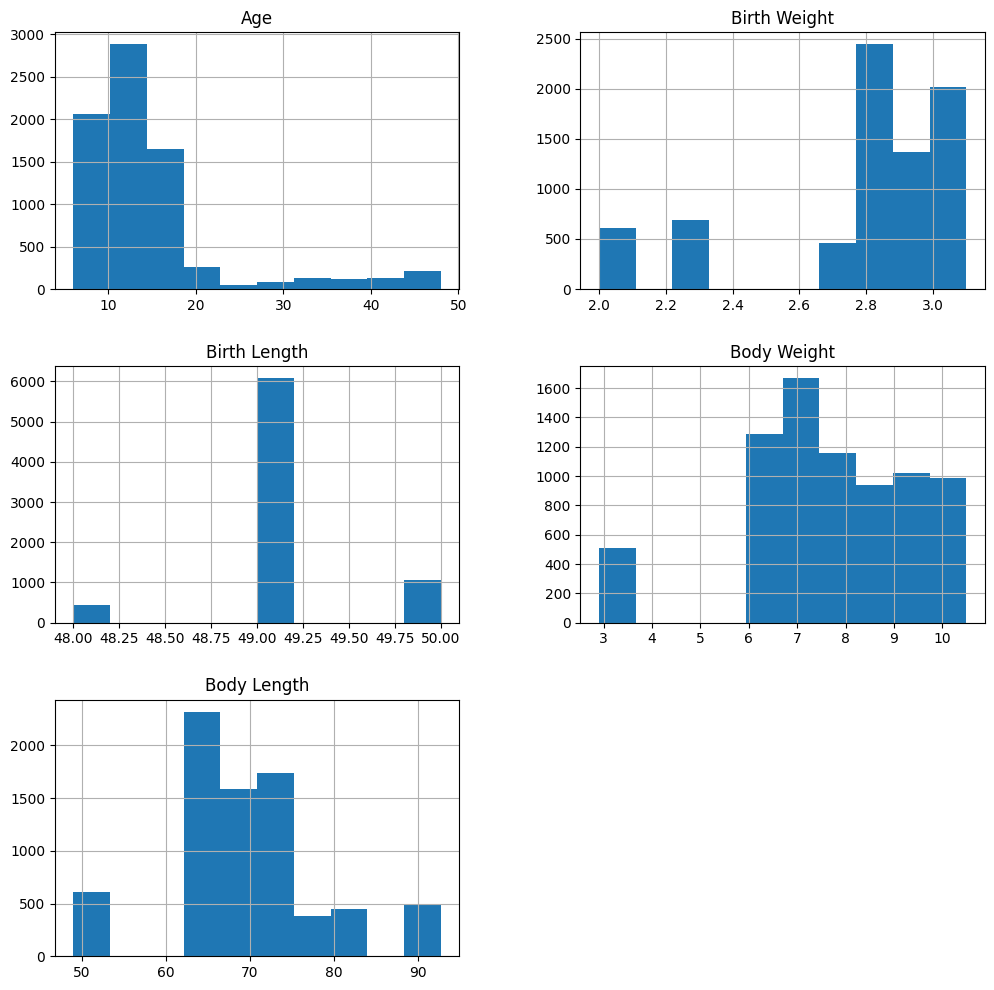

In [ ]:
# HISTOGRAM IN EACH VARIABLE
df_baru.hist(figsize = (12, 12))

plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

# Menghapus kolom "Stunting"
new = df_baru.drop(columns=["Stunting"])

# Normalisasi data menggunakan RobustScaler
scaler = RobustScaler()
robust_data = scaler.fit_transform(new)

# Mengonversi data yang telah dinormalisasi kembali ke DataFrame
robust_df = pd.DataFrame(robust_data, columns=new.columns)

# Menyimpan model normalisasi menggunakan joblib
joblib.dump(scaler, 'normalization_model.joblib')

# Mencetak DataFrame yang telah dinormalisasi
print(robust_df)

      Gender       Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0        0.0  0.666667           1.0           0.0         1.15     0.444444   
1        1.0 -0.333333           0.5           0.0        -2.40    -0.555556   
2        0.0  0.500000           0.5           0.0         0.40     0.444444   
3        0.0  3.000000           0.0           0.0        -0.65    -0.833333   
4        0.0  0.333333           1.5           0.0         1.40    -2.777778   
...      ...       ...           ...           ...          ...          ...   
7568     0.0 -0.333333           0.0          -1.0         1.40     0.625000   
7569     0.0  0.333333           0.0           0.0        -2.40     0.277778   
7570     1.0 -0.166667           0.0          -1.0         0.00    -0.833333   
7571     0.0  0.500000           0.0           0.0         0.00    -2.777778   
7572     1.0 -0.500000           1.0           0.0         0.00     1.527778   

      Breastfeeding  
0               0

In [ ]:
robust_df.Breastfeeding.value_counts()

Breastfeeding
0.0    7573
Name: count, dtype: int64

In [ ]:
#Data Splitting
# Separating the Feature and Labels
X = robust_df.drop(columns = 'Breastfeeding')
y = df_baru["Stunting"]

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [ ]:
# Periksa apakah ada NaN atau inf
print(np.any(np.isnan(X_train)), np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)), np.any(np.isinf(X_test)))

False False
False False


# **Model Architecture**

In [ ]:
# Definisikan model dengan regularisasi dan dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=6, kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Kompilasi model dengan optimizer dan metrics tambahan
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
48/48 [==============================] - 5s 17ms/step - loss: 0.8433 - accuracy: 0.5847 - val_loss: 0.8323 - val_accuracy: 0.7881
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 0.8241 - accuracy: 0.7463 - val_loss: 0.8150 - val_accuracy: 0.8257
Epoch 3/100
48/48 [==============================] - 0s 9ms/step - loss: 0.8043 - accuracy: 0.7866 - val_loss: 0.7895 - val_accuracy: 0.8257
Epoch 4/100
48/48 [==============================] - 0s 7ms/step - loss: 0.7757 - accuracy: 0.7976 - val_loss: 0.7489 - val_accuracy: 0.8257
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.7293 - accuracy: 0.8019 - val_loss: 0.6893 - val_accuracy: 0.8257
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.8034 - val_loss: 0.6239 - val_accuracy: 0.8257
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 0.6258 - accuracy: 0.8036 - val_loss: 0.5757 - val_accuracy: 0.8257
Epoch 8/100


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 1

In [ ]:
#save model ke h5
model.save("model_stunting_anak.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Fungsi untuk menghitung IMT
def hitung_imt(row):
    tinggi_meter = row['Body Length'] / 100  # Konversi tinggi badan ke meter
    berat_badan = row['Body Weight']
    imt = berat_badan / (tinggi_meter ** 2)
    return imt
# Fungsi untuk menghitung Kebutuhan Gizi
def hitung_kebutuhan_gizi(row):
    berat_badan = row['Body Weight']
    kebutuhan_gizi = berat_badan * 0.5 + 4.5
    return kebutuhan_gizi
# Fungsi untuk menghitung Kebutuhan Gizi
def hitung_kebutuhan_kalori(row):
    berat_badan = row['Body Weight']
    umur_tahun = row['Age'] / 12
    if umur_tahun <= 0.3:
        return (89 * berat_badan - 100) + 175  # Rata-rata untuk 0-3 bulan
    elif umur_tahun <= 0.6:
        return (89 * berat_badan - 100) + 56  # Estimasi untuk 4-6 bulan
    elif umur_tahun <= 1:
        return (89 * berat_badan - 100) + 22  # Estimasi untuk 7-12 bulan
    elif umur_tahun <= 3.5:
        return (89 * berat_badan - 100) + 20  # Estimasi untuk 1-3 tahun
    elif umur_tahun <= 6:
        return 1400 # Estimasi untuk 4-6 tahun
    else:
        raise ValueError("Umur di luar rentang yang didukung")
    return hitung_kebutuhan_kalori
# Fungsi untuk menghitung Kebutuhan Protein
def hitung_kebutuhan_protein(row):
    kebutuhan_gizi = hitung_kebutuhan_gizi(row)
    kebutuhan_protein = kebutuhan_gizi * 0.15 + 1.5
    return kebutuhan_protein

# Tambahkan kolom IMT ke DataFrame
df_baru['IMT'] = df_baru.apply(hitung_imt, axis=1)
df_baru['Kebutuhan Kalori (gram/hari)'] = df_baru.apply(hitung_kebutuhan_kalori, axis=1)
df_baru['Kebutuhan Protein (gram/hari)'] = df_baru.apply(hitung_kebutuhan_protein, axis=1)

# Cetak DataFrame dengan kolom IMT
print(df_baru)

     Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0         0   17           3.0            49         10.0         72.2   
1         1   11           2.9            49          2.9         65.0   
2         0   16           2.9            49          8.5         72.2   
3         0   31           2.8            49          6.4         63.0   
4         0   15           3.1            49         10.5         49.0   
...     ...  ...           ...           ...          ...          ...   
9992      0   11           2.8            48         10.5         73.5   
9994      0   15           2.8            49          2.9         71.0   
9996      1   12           2.8            48          7.7         63.0   
9997      0   16           2.8            49          7.7         49.0   
9999      1   10           3.0            49          7.7         80.0   

     Breastfeeding Stunting        IMT  Kebutuhan Kalori (gram/hari)  \
0                0        0  19.183401 

In [ ]:
df_baru.to_csv('data_anak.csv', index=False)

In [ ]:
recommendation_rules = {
    'stunting': {
        'anemia': "Anak terdeteksi stunting dan menderita anemia. Sebaiknya tambahkan makanan kaya zat besi seperti daging tanpa lemak, ikan, unggas, kacang lentil, dan sereal yang diperkaya zat besi. Pastikan asupan kalori dan protein mencukupi.",
        'vitamin A deficiency': "Anak terdeteksi stunting dan memiliki kekurangan vitamin A. Tambahkan makanan kaya vitamin A seperti wortel, ubi jalar, bayam, dan sayuran berdaun hijau lainnya. Pastikan nutrisi seimbang dan asupan kalori mencukupi.",
        'chronic illness': "Anak memiliki penyakit kronis dan terdeteksi stunting. Konsultasikan dengan penyedia layanan kesehatan untuk rencana nutrisi khusus dan pastikan asupan nutrisi mencukupi.",
        'frequent infections': "Anak sering mengalami infeksi dan terdeteksi stunting. Pastikan kebersihan yang baik dan diet kaya vitamin dan mineral untuk meningkatkan daya tahan tubuh. Konsultasikan dengan penyedia layanan kesehatan untuk bimbingan lebih lanjut.",
        'food allergies': "Anak memiliki alergi makanan dan terdeteksi stunting. Hindari makanan yang menyebabkan alergi dan konsultasikan dengan ahli gizi untuk alternatif makanan yang aman dan bergizi. Pastikan nutrisi seimbang meskipun ada batasan diet.",
        'default': "Anak terdeteksi stunting. Pastikan nutrisi seimbang dan asupan kalori mencukupi. Fokus pada makanan tinggi protein seperti telur, produk susu, dan kacang-kacangan. Konsultasikan dengan penyedia layanan kesehatan untuk penilaian lebih lanjut."
    },
    'normal': {
        'anemia': "Anak menderita anemia tetapi sehat. Tambahkan makanan kaya zat besi seperti daging tanpa lemak, ikan, unggas, kacang lentil, dan sereal yang diperkaya zat besi. Pastikan pemeriksaan rutin dengan penyedia layanan kesehatan.",
        'vitamin A deficiency': "Anak memiliki kekurangan vitamin A tetapi sehat. Tambahkan makanan kaya vitamin A seperti wortel, ubi jalar, bayam, dan sayuran berdaun hijau lainnya. Pertahankan diet seimbang dengan berbagai buah dan sayuran.",
        'chronic illness': "Anak memiliki penyakit kronis tetapi sehat. Konsultasikan dengan penyedia layanan kesehatan untuk rencana nutrisi khusus dan pastikan asupan nutrisi mencukupi.",
        'frequent infections': "Pastikan kebersihan yang baik dan diet kaya vitamin dan mineral untuk meningkatkan daya tahan tubuh. Konsultasikan dengan penyedia layanan kesehatan untuk bimbingan lebih lanjut.",
        'food allergies': "Anak memiliki alergi makanan tetapi sehat. Hindari makanan yang menyebabkan alergi dan konsultasikan dengan ahli gizi untuk alternatif makanan yang aman dan bergizi. Pertahankan diet seimbang.",
        'default': "Anak sehat. Pertahankan diet seimbang dengan banyak buah, sayuran, biji-bijian utuh, dan protein rendah lemak. Dorong aktivitas fisik dan pastikan pemeriksaan medis rutin."
    }}

recommendation_rules_bayi = {
    'stunting': {
        'default': "Anak terdeteksi stunting. Pastikan pemberian ASI eksklusif atau susu formula yang memenuhi kebutuhan gizinya. Lakukan pemeriksaan rutin ke dokter anak untuk pemantauan pertumbuhan dan perkembangan.",
        'hiv': "Penghentian penyusuan oleh ibu yang terinfeksi HIV sebaiknya dilakukan secara bertahap selama sebulan, dan jika mereka atau bayi mereka sedang menjalani profilaksis ARV, profilaksis tersebut harus diteruskan selama satu minggu setelah berhenti menyusui sepenuhnya. Menghentikan penyusuan secara mendadak bisa berbahaya dan tidak dianjurkan. Penyusuan baru boleh dihentikan ketika tersedia makanan lain yang aman dan cukup nutrisi untuk menggantikan ASI.",
        'premature': "Anak lahir prematur dan terdeteksi stunting. Pastikan asupan ASI atau susu formula yang mencukupi. Konsultasikan dengan dokter anak untuk memastikan pertumbuhan dan perkembangan yang optimal.",
        'asi_eksklusif': "Bayi sebaiknya mendapatkan ASI dari ibu sendiri/donor ASI selama enam bulan pertama kehidupan untuk mencapai pertumbuhan, perkembangan, dan kesehatan optimal.",
        'masalah_kesehatan': "Konsultasikan dengan dokter untuk mengatasi masalah kesehatan yang sering terjadi pada anak.",
        'riwayat_alergi': "Pantau makanan dan lingkungan sekitar anak untuk menghindari alergen.",
        'dirawat_rumah_sakit': "Pastikan anak mendapatkan pemulihan yang cukup setelah perawatan di rumah sakit."
    },
    'normal': {
        'default': "Anak Normal. Pastikan pemberian ASI eksklusif atau susu formula yang memenuhi kebutuhan gizinya. Lakukan pemeriksaan rutin ke dokter anak untuk pemantauan pertumbuhan dan perkembangan.",
        'hiv': "Penghentian penyusuan oleh ibu yang terinfeksi HIV sebaiknya dilakukan secara bertahap selama sebulan, dan jika mereka atau bayi mereka sedang menjalani profilaksis ARV, profilaksis tersebut harus diteruskan selama satu minggu setelah berhenti menyusui sepenuhnya. Menghentikan penyusuan secara mendadak bisa berbahaya dan tidak dianjurkan. Penyusuan baru boleh dihentikan ketika tersedia makanan lain yang aman dan cukup nutrisi untuk menggantikan ASI.",
        'premature': "Anak lahir prematur dan terdeteksi stunting. Pastikan asupan ASI atau susu formula yang mencukupi. Konsultasikan dengan dokter anak untuk memastikan pertumbuhan dan perkembangan yang optimal.",
        'asi_eksklusif': "Bayi sebaiknya mendapatkan ASI dari ibu sendiri/donor ASI selama enam bulan pertama kehidupan untuk mencapai pertumbuhan, perkembangan, dan kesehatan optimal.",
        'masalah_kesehatan': "Konsultasikan dengan dokter untuk mengatasi masalah kesehatan yang sering terjadi pada anak.",
        'riwayat_alergi': "Pantau makanan dan lingkungan sekitar anak untuk menghindari alergen.",
        'dirawat_rumah_sakit': "Pastikan anak mendapatkan pemulihan yang cukup setelah perawatan di rumah sakit."
    }
}

In [ ]:
def detection():
    Name = input("Masukan Nama Anak Anda: ")
    Gender = int(input("Masukan Jenis Kelamin Anak Anda (0: Laki-laki, 1: Perempuan): "))
    Age = int(input("Berapa bulan umur anak Anda (bulan): "))
    Birth_Weight = float(input("Berapa berat badan Anak Anda saat lahir (satuan kg): "))
    Birth_Length = float(input("Berapa tinggi badan Anak Anda saat lahir (satuan cm): "))
    Body_Weight = float(input("Berapa berat badan Anak Anda saat ini (satuan kg): "))
    Body_Length = float(input("Berapa tinggi badan Anak Anda saat ini (satuan cm): "))

    if Age < 6:
        hiv = input("Apakah ibu terinfeksi HIV (ya/tidak): ").lower() == 'ya'
        premature = input("Apakah anak Anda lahir prematur? (ya/tidak): ").lower() == 'ya'
        asi_eksklusif = input("Apakah anak Anda mendapatkan ASI eksklusif? (ya/tidak): ").lower() == 'ya'
        if not asi_eksklusif:
            susu_formula = input("Jika tidak ASI, apakah anak Anda mendapatkan susu formula? (ya/tidak): ").lower() == 'ya'
        else:
            susu_formula = False  # Default value if ASI eksklusif
        menyusu_per_hari = int(input("Seberapa sering anak Anda menyusu dalam sehari? (kali): "))
        masalah_kesehatan = input("Apakah anak Anda sering mengalami masalah kesehatan seperti demam atau infeksi? (ya/tidak): ").lower() == 'ya'
        riwayat_alergi = input("Apakah anak Anda memiliki riwayat alergi? (ya/tidak): ").lower() == 'ya'
        dirawat_rumah_sakit = input("Apakah anak Anda pernah dirawat di rumah sakit? (ya/tidak): ").lower() == 'ya'
        pertumbuhan = input("Bagaimana pertumbuhan anak Anda selama beberapa bulan terakhir? Apakah ada penurunan atau kenaikan berat badan yang signifikan? (ada/tidak): ")
        tonggak_perkembangan = input("Apakah anak Anda telah mencapai tonggak perkembangan tertentu (seperti mengangkat kepala, tersenyum, meraih benda)? (ya/tidak): ").lower() == 'ya'


    else:
        # Additional questions
        eating_pattern = input("Apakah anak memiliki pola makan yang teratur? (yes/no): ").lower() == 'yes'
        physical_activity = input("Seberapa sering anak berolahraga atau beraktivitas fisik? (contoh: setiap hari, 2-3 kali seminggu, jarang): ")
        eating_habits = input("Apakah anak suka makan buah dan sayuran? (yes/no): ").lower() == 'yes'
        health_history = input("Apakah anak memiliki riwayat penyakit tertentu seperti alergi makanan atau gangguan pencernaan? (yes/no): ").lower() == 'yes'
        growth_history = input("Bagaimana pertumbuhan dan perkembangan anak selama beberapa bulan terakhir? (baik/cukup/tidak baik): ")
        environmental_condition = input("Apakah lingkungan tempat tinggal anak mendukung pola makan yang sehat? (yes/no): ").lower() == 'yes'

        # Get additional health conditions
        anemia = input("Apakah anak Anda menderita anemia? (yes/no): ").lower() == 'yes'
        vitamin_a_deficiency = input("Apakah anak Anda menderita kekurangan vitamin A? (yes/no): ").lower() == 'yes'
        chronic_illness = input("Apakah anak Anda memiliki penyakit kronis? (yes/no): ").lower() == 'yes'
        frequent_infections = input("Apakah anak Anda sering mengalami infeksi? (yes/no): ").lower() == 'yes'
        food_allergies = input("Apakah anak Anda memiliki alergi makanan? (yes/no): ").lower() == 'yes'


    data = np.array([[Gender, Age, Birth_Weight, Birth_Length, Body_Weight, Body_Length]])
    deteksi = model.predict(data)
    print(deteksi)
    print("\n")
    detection_result = deteksi[0]

    # Determine stunting status
    stunting_status = 'stunting' if detection_result > 0.5 else 'normal'
    if stunting_status == 'stunting':
        print(Name + " terdeteksi Stunting")
    else:
        print(Name + " terdeteksi Normal")

    # Generate recommendations
    if Age < 6:
        recommendations = [recommendation_rules_bayi[stunting_status]['default']]
        if hiv:
            recommendations.append(recommendation_rules_bayi[stunting_status]['hiv'])
        if premature:
            recommendations.append(recommendation_rules_bayi[stunting_status]['premature'])
        if not asi_eksklusif:
            recommendations.append(recommendation_rules_bayi[stunting_status]['asi_eksklusif'])
        if susu_formula:
            recommendations.append("Jika anak tidak mendapatkan ASI, pastikan susu formula yang diberikan sesuai dengan kebutuhan anak.")
        if menyusu_per_hari < 8:
            recommendations.append("Frekuensi menyusui bayi sebaiknya lebih dari 8 kali sehari.")
        if masalah_kesehatan:
            recommendations.append(recommendation_rules_bayi[stunting_status]['masalah_kesehatan'])
        if riwayat_alergi:
            recommendations.append(recommendation_rules_bayi[stunting_status]['riwayat_alergi'])
        if dirawat_rumah_sakit:
            recommendations.append(recommendation_rules_bayi[stunting_status]['dirawat_rumah_sakit'])
        if "ada" in pertumbuhan:
            recommendations.append("Konsultasikan dengan dokter jika ada penurunan berat badan yang signifikan.")
        if not tonggak_perkembangan:
            recommendations.append(recommendation_rules_bayi[stunting_status]['tonggak_perkembangan'])

    else:
        recommendations = [recommendation_rules[stunting_status]['default']]
        if anemia:
            recommendations.append(recommendation_rules[stunting_status]['anemia'])
        if vitamin_a_deficiency:
            recommendations.append(recommendation_rules[stunting_status]['vitamin A deficiency'])
        if chronic_illness:
            recommendations.append(recommendation_rules[stunting_status]['chronic illness'])
        if frequent_infections:
            recommendations.append(recommendation_rules[stunting_status]['frequent infections'])
        if food_allergies:
            recommendations.append(recommendation_rules[stunting_status]['food allergies'])

        # Additional recommendations based on input
        if not eating_pattern:
            recommendations.append("Pastikan anak memiliki pola makan yang teratur dengan jadwal yang tetap.")
        if physical_activity.lower() not in ['setiap hari', 'hampir setiap hari']:
            recommendations.append("Anjurkan anak untuk berolahraga atau beraktivitas fisik minimal 1 jam setiap hari.")
        if not eating_habits:
            recommendations.append("Dorong anak untuk makan lebih banyak buah dan sayuran untuk memperoleh nutrisi yang seimbang.")
        if health_history:
            recommendations.append("Konsultasikan dengan dokter untuk mengatasi masalah kesehatan yang ada dan sesuaikan pola makan jika diperlukan.")
        if growth_history.lower() == 'tidak baik':
            recommendations.append("Konsultasikan dengan dokter untuk mengevaluasi pertumbuhan anak dan mencari solusi yang tepat.")
        if not environmental_condition:
            recommendations.append("Pastikan lingkungan tempat tinggal anak mendukung pola makan yang sehat, hindari makanan tidak sehat di rumah.")
    # Correct IMT calculation
    tinggi_meter = Body_Length / 100  # Convert height to meters
    IMT = Body_Weight / (tinggi_meter ** 2)
    kebutuhan_gizi = Body_Weight * 0.5 + 4.5

    # Fungsi untuk menghitung kebutuhan kalori berdasarkan umur, jenis kelamin, dan berat badan
    def kebutuhan_kalori(umur_bulan, berat_badan):
      umur_tahun = umur_bulan / 12
      if umur_tahun <= 0.3:
          return (89 * berat_badan - 100) + 175  # Rata-rata untuk 0-3 bulan
      elif umur_tahun <= 0.6:
          return (89 * berat_badan - 100) + 56  # Estimasi untuk 4-6 bulan
      elif umur_tahun <= 1:
          return (89 * berat_badan - 100) + 22  # Estimasi untuk 7-12 bulan
      elif umur_tahun <= 3.5:
          return (89 * berat_badan - 100) + 20  # Estimasi untuk 1-3 tahun
      elif umur_tahun <= 6:
          return 1400 # Estimasi untuk 4-6 tahun
      else:
          raise ValueError("Umur di luar rentang yang didukung")
      return hitung_kebutuhan_kalori

    # Fungsi untuk menghitung kebutuhan serat berdasarkan umur
    def kebutuhan_serat(umur_bulan):
      umur_tahun = umur_bulan / 12
      if umur_tahun <= 0.5:
          return 0  # Rata-rata untuk 0-5 bulan
      elif umur_tahun <= 0.11:
          return 11 # Estimasi untuk 6-11 bulan
      elif umur_tahun <= 3:
          return 19  # Estimasi untuk 1-3 tahun
      elif umur_tahun <= 6:
          return 20 # Estimasi untuk 4-6 tahun
      else:
          raise ValueError("Umur di luar rentang yang didukung")

    # Fungsi untuk menghitung kebutuhan air berdasarkan berat badan
    def kebutuhan_air(berat_badan):
      return berat_badan * 100  # Dalam ml

    # Fungsi untuk menghitung kebutuhan lemak berdasarkan kalori
    def kebutuhan_lemak(kalori):
      return 0.3 * kalori / 9  # 30% dari kalori, dengan 1 gram lemak = 9 kalori

    # Fungsi untuk menghitung kebutuhan karbohidrat berdasarkan kalori
    def kebutuhan_karbohidrat(kalori):
      return 0.55 * kalori / 4  # 55% dari kalori, dengan 1 gram karbohidrat = 4 kalori

    # Fungsi untuk menghitung kebutuhan protein berdasarkan kalori
    def kebutuhan_protein(kalori):
      return 0.15 * kalori / 4  # 15% dari kalori, dengan 1 gram protein = 4 kalori


    print(f"\nRangkuman Gizi yang dibutuhkan {Name} :")
    jenis_kelamin_str = 'Laki-laki' if Gender == 0 else 'Perempuan'
    kebutuhan_kalori_harian = kebutuhan_kalori(Age, Body_Weight)
    kebutuhan_serat_harian = kebutuhan_serat(Age)
    kebutuhan_air_harian = kebutuhan_air(Body_Weight)
    kebutuhan_lemak_harian = kebutuhan_lemak(kebutuhan_kalori_harian)
    kebutuhan_karbohidrat_harian = kebutuhan_karbohidrat(kebutuhan_kalori_harian)
    kebutuhan_protein_harian = kebutuhan_protein(kebutuhan_kalori_harian)

    # Simple evaluation (for demonstration purposes only, not for clinical use)
    if IMT < 14:
        imt_status = "Berat badan kurang"
    elif 14 <= IMT < 18:
        imt_status = "Berat badan normal"
    elif 18 <= IMT < 20:
        imt_status = "Risiko kelebihan berat badan"
    else:
        imt_status = "Kelebihan berat badan"

    print(f"IMT {Name} sebesar {IMT:.2f} dengan status: {imt_status}")
    print(f"Kebutuhan kalori harian : {kebutuhan_kalori_harian} kalori.")
    print(f"Kebutuhan serat harian : {kebutuhan_serat_harian} gram.")
    print(f"Kebutuhan air harian : {kebutuhan_air_harian:.2f} ml.")
    print(f"Kebutuhan lemak harian : {kebutuhan_lemak_harian:.2f} gram.")
    print(f"Kebutuhan karbohidrat harian : {kebutuhan_karbohidrat_harian:.2f} gram.")
    print(f"Kebutuhan protein harian : {kebutuhan_protein_harian:.2f} gram.")


    recommendations.append(f"Kebutuhan gizi harian untuk {Name}:{kebutuhan_kalori_harian} kalori, {kebutuhan_serat_harian} gram serat, {kebutuhan_air_harian:.2f} ml air, {kebutuhan_lemak_harian:.2f} gram lemak, {kebutuhan_karbohidrat_harian:.2f} gram karbohidrat, {kebutuhan_protein_harian:.2f} gram protein ")

    # Print recommendations
    print("\n Rekomendasi untuk " + Name + ":")
    for recommendation in recommendations:
        print("- " + recommendation)



detection()


Masukan Nama Anak Anda: Arfi
Masukan Jenis Kelamin Anak Anda (0: Laki-laki, 1: Perempuan): 0
Berapa bulan umur anak Anda (bulan): 24
Berapa berat badan Anak Anda saat lahir (satuan kg): 2.9
Berapa tinggi badan Anak Anda saat lahir (satuan cm): 40
Berapa berat badan Anak Anda saat ini (satuan kg): 20
Berapa tinggi badan Anak Anda saat ini (satuan cm): 50
Apakah anak memiliki pola makan yang teratur? (yes/no): 1
Seberapa sering anak berolahraga atau beraktivitas fisik? (contoh: setiap hari, 2-3 kali seminggu, jarang): setiap hari
Apakah anak suka makan buah dan sayuran? (yes/no): yes
Apakah anak memiliki riwayat penyakit tertentu seperti alergi makanan atau gangguan pencernaan? (yes/no): yes
Bagaimana pertumbuhan dan perkembangan anak selama beberapa bulan terakhir? (baik/cukup/tidak baik): baik
Apakah lingkungan tempat tinggal anak mendukung pola makan yang sehat? (yes/no): yes
Apakah anak Anda menderita anemia? (yes/no): yes
Apakah anak Anda menderita kekurangan vitamin A? (yes/no): ye

#prediksi sebelumnya (ditutup)


In [ ]:
prediction = model.predict(np.array([[1, 11, 1.5, 3.3, 7.5, 70]]))
# Fungsi untuk mengubah hasil prediksi menjadi kalimat "Yes" atau "No"
def predict_result(prediction):
    if prediction == 1:
        return "Yes"
    else:
        return "No"

# Menghasilkan kalimat berdasarkan hasil prediksi
result = predict_result(prediction)

print(result)

1/1 [==============================] - 0s 37ms/step
Yes


In [ ]:
prediction = model.predict(np.array([[1, 10, 2.5, 50, 9, 80]]))
# Fungsi untuk mengubah hasil prediksi menjadi kalimat "Yes" atau "No"
def predict_result(prediction):
    if prediction == 1:
        return "Yes"
    else:
        return "No"

# Menghasilkan kalimat berdasarkan hasil prediksi
result = predict_result(prediction)

print(result)

1/1 [==============================] - 0s 23ms/step
No


# **Model Evaluation**

48/48 [==============================] - 0s 3ms/step


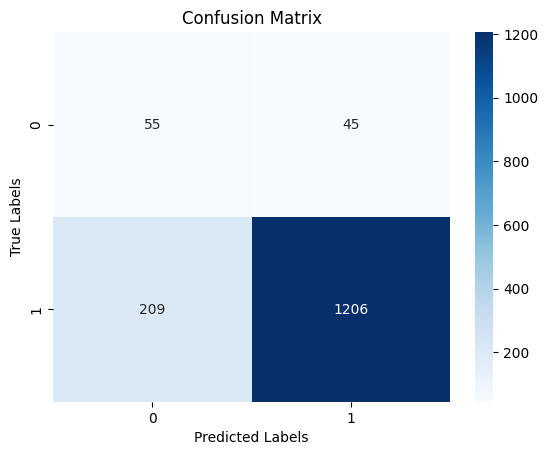

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert continuous variable to binary labels
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Create the confusion matrix
confusion = confusion_matrix(y_pred_binary, y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")

# Set the axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the title
plt.title("Confusion Matrix")

# Display the plot
plt.show()

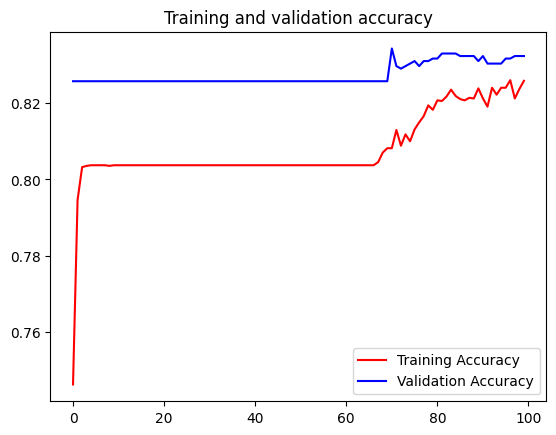

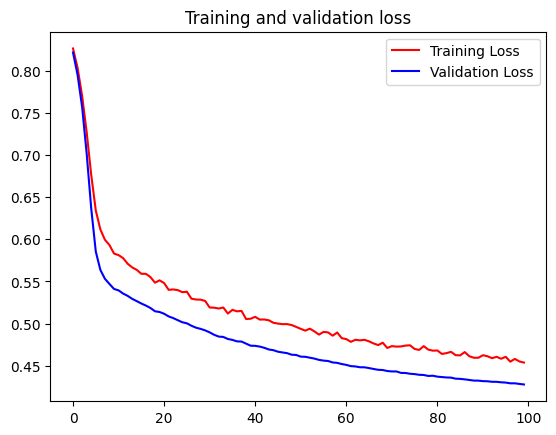

In [ ]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()  # Add legend to the plot
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()  # Add legend to the plot
plt.show()

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the metrics report
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

Precision: 0.8522968197879859
Recall: 0.9640287769784173
F1 Score: 0.9047261815453864
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.21      0.30       264
           1       0.85      0.96      0.90      1251

    accuracy                           0.83      1515
   macro avg       0.70      0.59      0.60      1515
weighted avg       0.80      0.83      0.80      1515



In [ ]:
# Saving model
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("my_h5_model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_h5_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('my_model')

#tflite

In [ ]:
print('\u2022 Using TensorFlow Version:', tf.__version__)

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])

    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)

    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass